# Test implémentation de FastText avec Pytorch

In [1]:
import sys
sys.path.append("../")
sys.path.append("../src/")

## Chargement des données

In [3]:
import pandas as pd
df_orig = pd.read_parquet("../data/extraction_sirene_20220712.parquet", engine="pyarrow")

In [4]:
distinct_values = df_orig["APE_SICORE"].unique().tolist()
y_dict = {key: value for key, value in zip(distinct_values, range(len(distinct_values)))}

In [5]:
import pandas as pd
import yaml

df = df_orig.sample(frac=0.001, random_state=1)

In [6]:
df.shape

(10866, 20)

## Chargement du fichier de configuration sans variable catégorielle

In [7]:
config_path = "../config/config_fasttext_00.yaml"
with open(config_path, "r") as stream:
    fasttext_config = yaml.safe_load(stream)
params = fasttext_config["params"]
categorical_features = fasttext_config["categorical_features"]

In [8]:
categorical_features

## Entraînement du modèle

In [9]:
from fasttext_classifier.fasttext_preprocessor import FastTextPreprocessor
from fasttext_classifier.fasttext_trainer import FastTextTrainer

preprocessor = FastTextPreprocessor()
trainer = FastTextTrainer()

In [10]:
from src.constants import TEXT_FEATURE, Y

In [11]:
# Preprocess data
df_train, df_test, df_gu = preprocessor.preprocess(
    df=df,
    y=Y,
    text_feature=TEXT_FEATURE,
    categorical_features=categorical_features,
)

# Run training of the model
model = trainer.train(df_train, Y, TEXT_FEATURE, categorical_features, params)

Read 0M words
Number of words:  1417
Number of labels: 428
Progress: 100.0% words/sec/thread:    6588 lr:  0.000000 avg.loss:  2.017687 ETA:   0h 0m 0s


In [12]:
df_train.head()

,LIB_SICORE,APE_NIV5
LIA_NUM,,
U44074165258,dieteticien,8690F
U63070437203,medium voi energeticien,9609Z
I33186517343,producteur electricit photovolta,3511Z
C72019032577,product electricit,3511Z
M73017781391,maconner,4399C


In [134]:
word_id_mapping = {}
for sentence in df_train["LIB_SICORE"]:
    for word in sentence.split(" "):
        word_id_mapping[word] = model.get_word_id(word)

In [142]:
df_train.tail(20)

,LIB_SICORE,APE_NIV5
LIA_NUM,,
U31073440239,product spectacl viv,9001Z
G31520227555,achat vent locat tous vehicul neuf er occas sa...,4511Z
U59073596087,enlev livraison marchandis,5320Z
G92511544765,livraison rep cours a domicil velo,5320Z
G57015046108,agent commercial,4617B
M33019511555,traval finit bat,4339Z
X38011010489,sylvicultur autr activit forestier,0210Z
U69075690803,conseil commun organis,7021Z
C63029039224,heberg restaur,5510Z


In [163]:
word_counts = {}
for sentence in df_train["LIB_SICORE"]:
    for word in sentence.split(" "):
        word_counts[word] = word_counts.setdefault(word, 0) + 1

In [165]:
new_word_id_mapping = {}
i = 1
for word, counts in word_counts.items():
    if word_counts[word] > 2:
        new_word_id_mapping[word] = i
        i += 1

In [166]:
len(word_id_mapping)

3604

In [167]:
len(new_word_id_mapping)

1417

In [168]:
nwords

1417

In [ ]:
for word in .replace(', ',' ').split():
    wordfreq[word] = wordfreq.setdefault(word, 0) + 1

In [157]:
for i in range(1, 50):
    indices = indices_matrix(df_train["LIB_SICORE"][-i], model)
    for word in df_train["LIB_SICORE"][-i].split(" "):
        if model.get_word_id(word) == -1:
            print(df_train["LIB_SICORE"][-i])
            print(word)

    if -1 in indices:
        print(indices)

edit publiqu lign bas donne repertoir list adress
repertoir
edit publiqu lign bas donne repertoir list adress
list
edit publiqu lign bas donne repertoir list adress
adress
acquisit propriet gestion administr disposit bien immobili protefeuill
protefeuill
radiologu remplac
radiologu
commerc lign produit textil edit limite statu collect film dessin anime servic
limite
commerc lign produit textil edit limite statu collect film dessin anime servic
statu
commerc lign produit textil edit limite statu collect film dessin anime servic
anime
product commercialis volaill fermier oeuf tous produit deriv
fermier
mecan carrosser locat achat vent lavag nettoyag depannag vehicul motoris non auto moto quad
quad
feder promouvoir activit artist membr
feder


In [135]:
len(word_id_mapping)

3604

In [170]:
from pytorch_classifier.pytorch_utils import indices_matrix

text = df_train["LIB_SICORE"]
indices_batch = [indices_matrix(
    sentence, model
    ) for sentence in text]

In [96]:
[tokens.shape for tokens in indices_batch]

[(24,), (48,), (66,), (38,), (18,), (56,), (34,), (34,), (52,), (64,)]

In [121]:
indices_batch[1]

array([    622,  403022, 1843452,  916994,  928569,  601928, 1143943,
        783114,  977421,  356435, 1788453,  847108,     110,  422353,
       1078524, 2001002, 1837974,  138490,     422,  454853,  178468,
        500166,  931558, 1488339,  934240, 1975212, 1622843, 1949298,
        587184,  116832, 1007907,   45592,   66829, 1720752, 1931859,
        679149, 1372828,  876245, 1255311, 1799600,  720868,  620645,
             0,  714332,  396081,  319073,  968503, 1208858])

In [98]:
tokens = []
indices = []
for word in model.get_line(text[0])[0]:
    tokens += model.get_subwords(word)[0]
    indices += model.get_subwords(word)[1].tolist()

In [99]:
def get_ngram_list(word: str, n: int):        
    return [word[i: i+n] for i in range(len(word) - n + 1)]

In [100]:
nwords = len(model.get_words())
buckets = model.f.getArgs().bucket

In [101]:
nwords

1417

In [102]:
buckets

2000000

In [103]:
word_ngrams = model.f.getArgs().wordNgrams
word_ngrams

3

In [176]:
from pytorch_classifier.pytorch_utils import get_hash, get_word_ngram_id

def get_subword_hash(subword: str, buckets: int, nwords: int):
    """

    Args:
        raw_hash (int): _description_
    """
    return get_hash(subword) % buckets + nwords

def get_word_index(word: str):
    """_summary_

    Args:
        word (str): _description_
    """
    return new_word_id_mapping[word]

def get_subwords(word: str, min_n: int, max_n: int, buckets: int, nwords: int):
    """_summary_

    Args:
        word (str): _description_
    """
    if min_n < 2:
        raise ValueError("`min_n` parameter must be greater than 2.")
    if max_n > 6:
        raise ValueError("`max_n` parameter must be smaller than 7.")
        
    tokens = []
    word_with_tags = '<' + word + '>'
    for n in range(min_n, max_n + 1):
        tokens += get_ngram_list(word_with_tags, n)
    indices = [get_subword_hash(token, buckets, nwords) for token in tokens]

    # Add word
    try:
        tokens = [word] + tokens
        indices = [get_word_index(word)] + indices
    except KeyError:
        # print("Token was not in mapping, not adding it to subwords.")
        pass

    return (tokens, indices)

In [117]:
import numpy as np
def indices_matrix_no_ft(sentence: str, min_n: int, max_n: int, nwords: int, buckets: int, word_ngrams: int):
    """_summary_

    Args:
        sentence (str): _description_
    """
    indices = []
    words = []
    word_ngram_ids = []

    for word in sentence.split(" "):
        indices += get_subwords(word, min_n=min_n, max_n=max_n, buckets=buckets, nwords=nwords)[1]
        words += [word]
    
    # Adding end of string token
    indices += [0]
    words += ["</s>"]

    for word_ngram_len in range(2, word_ngrams + 1):
        for i in range(len(words) - word_ngram_len + 1):
            hashes = tuple(get_hash(word) for word in words[i : i + word_ngram_len])
            word_ngram_id = int(get_word_ngram_id(hashes, buckets, nwords))
            word_ngram_ids.append(word_ngram_id)

    all_indices = indices + word_ngram_ids
    return np.asarray(all_indices)


In [118]:
test = indices_matrix_no_ft(text[0], 3, 4, nwords, buckets, word_ngrams)

In [122]:
text[1]

'medium voi energeticien'

In [178]:
for i in range(len(df_train)):
    diff = len(indices_matrix_no_ft(text[i], 3, 4, nwords, buckets, word_ngrams)) - len(indices_batch[i])
    if diff != 0:
        print(i)

91
1178
1508
1523
4867
5824


In [182]:
df_train.iloc[1508]

LIB_SICORE         
APE_NIV5      4778C
Name: O00076420064, dtype: object

In [109]:
indices_batch[0]

array([    576,   50997,  517364,  341210, 1312968,  691982, 1947177,
       1156068,  319494, 1915707, 1288266,   45592,   66829, 1720752,
       1931859,  679149, 1372828,  876245, 1255311, 1799600,  720868,
        620645,       0, 1140484])

## Evaluation of the FastText model without categorical features

0
             ground_truth_2 ground_truth_3 ground_truth_4 ground_truth_5  \
liasseNb                                                                   
G75543170362             47            477           4779          4779Z   
A00990215265             81            813           8130          8130Z   
U75071417439             74            741           7410          7410Z   
G34541188426             53            532           5320          5320Z   
M87019007356             95            952           9529          9529Z   
...                     ...            ...            ...            ...   
C06059004508             27            274           2740          2740Z   
G83556639355             68            683           6831          6831Z   
G77523512381             53            532           5320          5320Z   
M76011885415             33            332           3320          3320A   
G55510018648             47            475           4759          4759B   

         

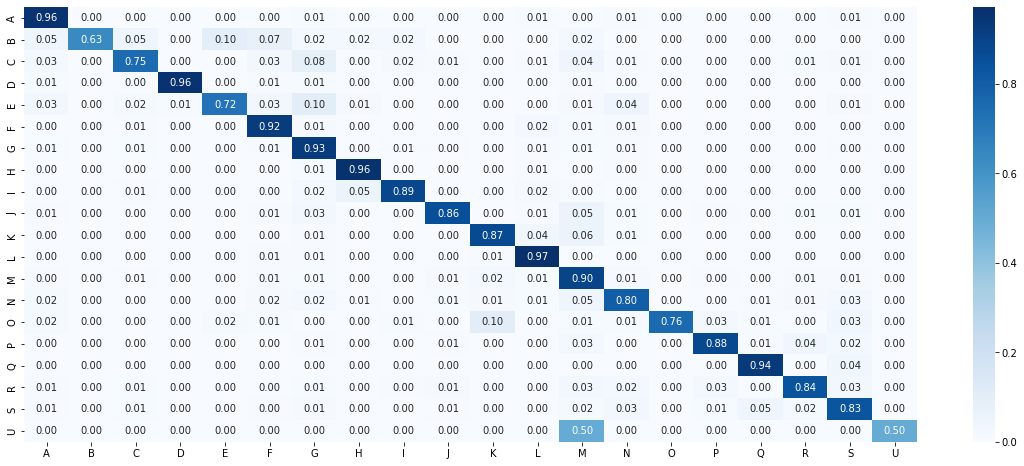

In [13]:
from fasttext_classifier.fasttext_evaluator import FastTextEvaluator

evaluator = FastTextEvaluator(model)
evaluation = evaluator.evaluate(
    df_test,
    Y,
    TEXT_FEATURE,
    categorical_features = categorical_features,
    k=2
)

In [19]:
evaluation[0]['accuracy_level_5']

0.8089895936685203

## Pytorch

In [20]:
from pytorch_classifier.pytorch_trainer import PytorchTrainer

# Trainer module
trainer = PytorchTrainer()

In [28]:
categorical_features = ['AUTO', 'NAT_SICORE', 'SURF', 'EVT_SICORE']

In [29]:
LEARNING_RATE = 3e-4
PATIENCE = 5
NUM_EPOCHS = 30

params = {
    "num_epochs": NUM_EPOCHS,
    "patience": PATIENCE,
    "train_proportion": 0.8,
    "batch_size": 64,
    "learning_rate": LEARNING_RATE,
    "fasttext_bin_path": "projet-ape/model_no_categorical.bin"
}

In [23]:
from pytorch_classifier.pytorch_preprocessor import PytorchPreprocessor

pytorch_preprocessor = PytorchPreprocessor()
df_train_py, df_test_py, df_gu_py = pytorch_preprocessor.preprocess(
    df=df,
    y=Y,
    text_feature=TEXT_FEATURE,
    categorical_features=categorical_features,
)

In [30]:
df_train_py.head()

,LIB_SICORE,AUTO,NAT_SICORE,SURF,EVT_SICORE,APE_NIV5
LIA_NUM,,,,,,
M94013856415,servic administr combin bureau,4,13,0,7,187
O00075154755,b,5,1,0,8,348
G78817252072,lmnp,3,1,0,12,25
G83838349047,loueur meubl non professionnel,3,1,0,1,25
G85017842569,auteur compositeur musiqu a imag,2,3,0,5,174


In [ ]:
pytorch_classifier = trainer.train(df_train_py, Y, TEXT_FEATURE, categorical_features, params)

  0%|          | 0/30 [00:00<?, ?it/s]

In [ ]:
df_test.shape

In [ ]:
df_test.head()

In [ ]:
model

In [ ]:
pytorch_classifier

In [ ]:
from pytorch_classifier.pytorch_evaluator import PytorchEvaluator

evaluator = PytorchEvaluator(fasttext_model=model, model=pytorch_classifier)

In [ ]:
test = evaluator.evaluate(
    df_test, Y, TEXT_FEATURE, categorical_features, 5
)

In [ ]:
from fasttext_classifier.fasttext_evaluator import FastTextEvaluator

ft_preprocessor = FastTextPreprocessor()
df_ft_train, df_ft_test, df_ft_gu = ft_preprocessor.preprocess(
    df=df,
    y=Y,
    text_feature=TEXT_FEATURE,
    categorical_features=categorical_features,
)
ft_evaluator = FastTextEvaluator(model)

In [ ]:
test = ft_evaluator.evaluate(df_ft_test, Y, TEXT_FEATURE, categorical_features, 5)

In [ ]:
model

In [ ]:
model.save_model("dummy_model.bin")